In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import cv2

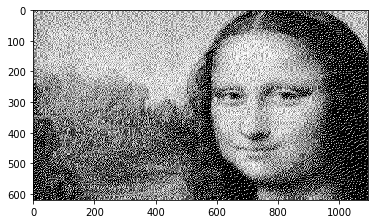

In [15]:
img = cv2.imread('/home/denocris/dli-lects_backup/images/monalisa2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

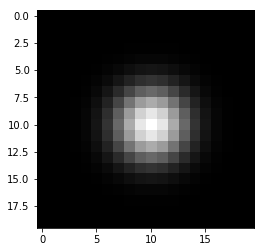

In [42]:
# Gaussian Filter
# first step is define the shape of gaussian function
Hg = np.zeros((20,20))
for i in range(20):
    for j in range(20):
        Hg[i,j] = np.exp(-((i-10)**2 + (j-10)**2)/10)
plt.imshow(Hg,cmap="gray")

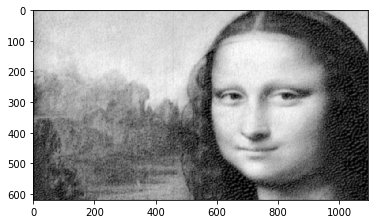

In [43]:
# scipy.signal.convolve2d help us to convolve the image with the kernel
# and slitting the filter in all image.
gray_blur = scipy.signal.convolve2d(gray,Hg,mode="same")
plt.imshow(gray_blur,cmap="gray")

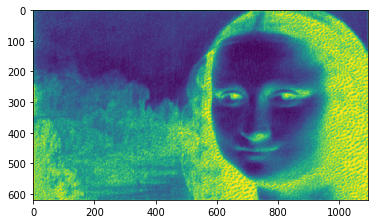

In [18]:
gray_bi = gray - gray_blur
plt.imshow(gray_bi)

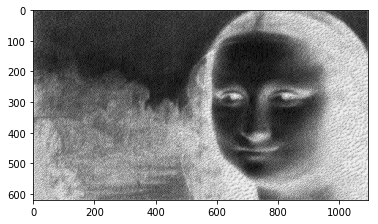

In [20]:
# gray_enhanced = gray + 0.025*gray_bi  
gray_enhanced = gray + 0.25*gray_bi
plt.imshow(gray_enhanced,cmap="gray")

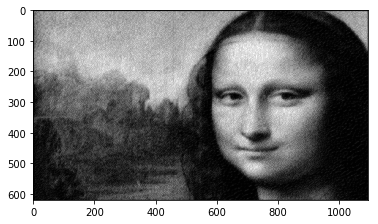

In [21]:
# hear we improve the resultset with moltiplication of images
# looks very beautiful now!!
gray_pp = gray_enhanced*gray_bi
plt.imshow(gray_pp,cmap="gray")

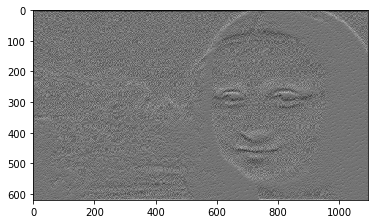

In [44]:
# now we try to apply the gradient based filters
# vertical slitting
grad = np.array([[0,-1,0],[0,0,0],[0,1,0]])
convol = scipy.signal.convolve2d(gray_pp,grad,mode="same")
plt.imshow(convol, cmap='gray')

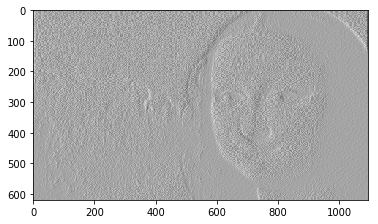

In [24]:
# Gradient based filters in orizontal directions
grad2 = np.array([[0,0,0],[1,0,-1],[0,0,0]])
convol2 = scipy.signal.convolve2d(gray_pp,grad2,mode="same")
plt.imshow(convol2, cmap='gray')

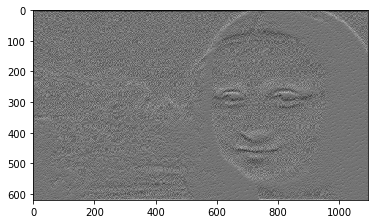

In [25]:
# now we try to apply the gradient based filters
# in this case the filter is in vertical direction
grad = np.array([[0,-1,0],[0,0,0],[0,1,0]])
convol = scipy.signal.convolve2d(gray_pp,grad,mode="same")
plt.imshow(convol, cmap='gray')

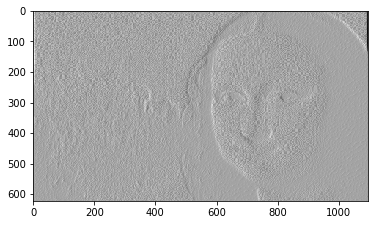

In [31]:
# SOBEL EDGE - DETECTION FILTER
# HORIZONTAL filter
filterH = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.float32)
convFH = scipy.signal.convolve2d(gray_pp, filterH)
plt.imshow(convFH,cmap='gray')

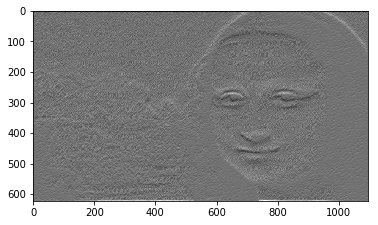

In [30]:
# HORIZONTAL filter
# for discover the edge shape in a image
filterV = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=np.float32)
convFV = scipy.signal.convolve2d(gray_pp, filterV)
plt.imshow(convFV,cmap='gray')

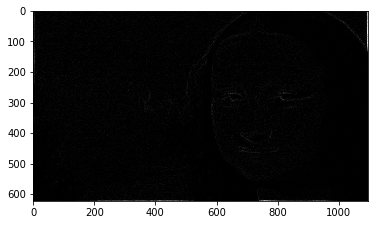

In [38]:
G = (convFH*convFH + convFV*convFV)*0.5
plt.imshow(G,cmap='gray')

**Use of the filters**

Mean Filter = Reduce Gaussian noise noise smooth the image after sampling 

Median Filter  = Reduce salt and pepper 

Sobel Filter = Detect edges in an image

Gaussian Filter = Reduce noise in an image

Canny Filter = Detect edges in an image

Weiner Filterv = Reduce additive noise and blurring


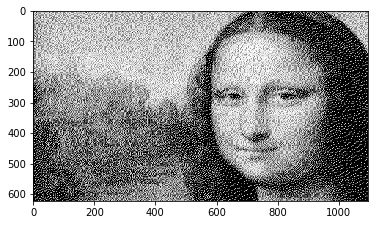

In [48]:
# Identity Filter
identity = np.array([[0,0,0],[0,1,0],[0,0,0]], dtype=np.float32)
conI = scipy.signal.convolve2d(gray, identity)
plt.imshow(conI, cmap='gray')

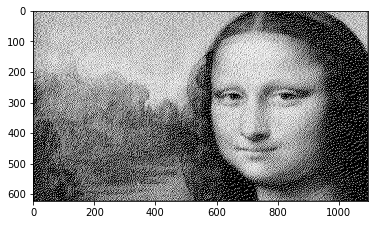

In [49]:
identity2 = np.array([[1,0,0],[0,1,0],[0,0,1]], dtype=np.float32)
conI2 = scipy.signal.convolve2d(gray, identity2)
plt.imshow(conI2, cmap='gray')